In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('Data/Medium_AggregatedData.csv', sep=',')

In [14]:
df.shape

(279577, 50)

In [15]:
df = df[df['language']=='en']

In [21]:
df_useful_columns = df.drop(['audioVersionDurationSec', 'codeBlockCount','isSubscriptionLocked','publicationdescription','publicationdomain','publicationfacebookPageName','publicationfollowerCount','publicationname','publicationpublicEmail',
                                                              'publicationslug','publicationtags','bio','userId','userName','usersFollowedByCount','usersFollowedCount','scrappedDate','codeBlock', 'publicationtwitterUsername', 'author'], axis=1)

In [22]:
df_drop_duplicate = df_useful_columns.drop_duplicates(subset='postId')

In [23]:
df_drop_duplicate.describe()

,imageCount,linksCount,readingTime,recommends,responsesCreatedCount,socialRecommendsCount,tagsCount,totalClapCount,wordCount,postCount
count,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000,66380.000000
mean,3.550136,6.606478,3.983713,25.196113,0.902757,0.069931,4.299940,173.135026,922.495089,60063.094908
std,5.399172,11.746137,3.506808,277.391004,14.940658,0.292918,1.203037,1891.890063,871.067923,61242.502841
min,0.000000,0.000000,0.003774,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.920755,0.000000,0.000000,0.000000,4.000000,0.000000,421.000000,30322.000000
50%,2.000000,4.000000,3.180189,2.000000,0.000000,0.000000,5.000000,6.000000,720.000000,51320.000000
75%,4.000000,8.000000,5.011557,8.000000,0.000000,0.000000,5.000000,65.000000,1158.000000,66154.000000
max,263.000000,1180.000000,99.603774,42288.000000,3076.000000,3.000000,6.000000,291706.000000,24964.000000,331914.000000


In [8]:
df_drop_duplicate.to_csv('Data/dropduplicate.csv', sep=',')

In [24]:
df_dummy = df_drop_duplicate.head(3)

In [25]:
df_dummy

,collectionId,createdDate,createdDatetime,firstPublishedDate,firstPublishedDatetime,imageCount,language,latestPublishedDate,latestPublishedDatetime,linksCount,...,uniqueSlug,updatedDate,updatedDatetime,url,vote,wordCount,tag_name,slug,name,postCount
0,638f418c8464,2018-09-18,2018-09-18 20:55:34,2018-09-18,2018-09-18 20:57:03,1,en,2018-09-18,2018-09-18 20:58:20,1,...,private-business-government-and-blockchain-100...,2018-09-18,2018-09-18 20:58:20,https://medium.com/s/story/private-business-go...,False,201,Blockchain,blockchain,Blockchain,265164.0
3,NaN,2018-01-07,2018-01-07 17:04:37,2018-01-07,2018-01-07 17:06:29,13,en,2018-01-07,2018-01-07 17:18:38,24,...,introduction-3-1000c43bcb97,2018-01-07,2018-01-07 17:18:39,https://medium.com/s/story/introduction-3-1000...,False,4854,Technology,technology,Technology,166125.0
7,NaN,2018-03-08,2018-03-08 07:04:31,2018-03-08,2018-03-08 07:07:42,1,en,2018-03-08,2018-03-08 07:07:42,3,...,ascent-of-data-science-sas-and-big-data-analys...,2018-03-08,2018-03-08 07:07:42,https://medium.com/s/story/ascent-of-data-scie...,False,533,Data Science,data-science,Data Science,33617.0


In [20]:
df_dummy.to_csv('Data/shortdummy.csv',sep=',')

In [26]:
tag = df_useful_columns.groupby('tag_name').size().sort_values(ascending=False)[:10]
top = list(tag.index)
value = list(tag.values)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

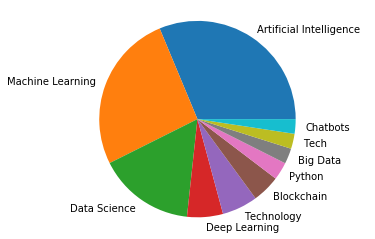

In [28]:
plt.pie(value, labels=top)
plt.axis('equal')
plt.show()

In [93]:
tag

tag_name
Artificial Intelligence    32824
Machine Learning           27383
Data Science               16689
Deep Learning               6194
Technology                  6163
Blockchain                  4801
Python                      3075
Big Data                    2670
Tech                        2599
Chatbots                    2515
dtype: int64

In [94]:
df[df['postId']=='100139913e4c'].to_csv('Data/same2.csv',sep=',')

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [29]:
text = ""
for ind, row in df_drop_duplicate.iterrows():
    text += str(row["title"]) + " "
text = text.strip()

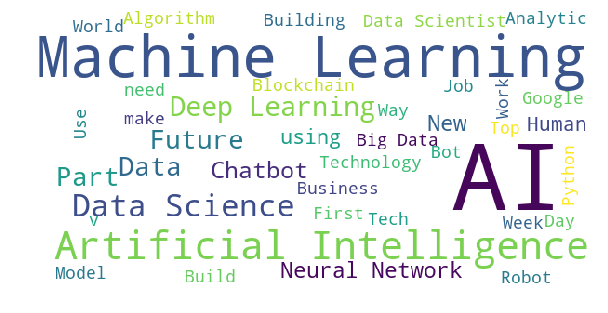

In [32]:
plt.figure(figsize=(10,8))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=100, max_words=40).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
df_test = df_drop_duplicate[df_drop_duplicate['totalClapCount']!=0]

In [44]:
df_new = df_test.groupby('totalClapCount').size()

/Users/devashish/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


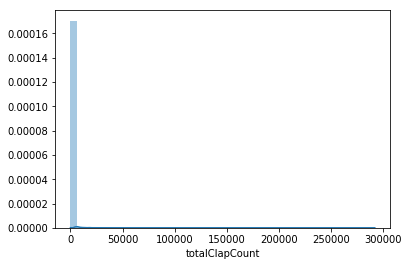

In [40]:
sns.distplot(df_test['totalClapCount'])

In [45]:
df_new

totalClapCount
1         5707
2         2410
3         1677
4         1092
5         1125
6          859
7          697
8          571
9          538
10         805
11         628
12         512
13         456
14         372
15         446
16         368
17         338
18         335
19         245
20         363
21         320
22         287
23         266
24         217
25         248
26         237
27         205
28         185
29         185
30         236
          ... 
30696        1
30749        1
32693        1
33098        1
33856        1
35046        1
35192        1
35232        1
35861        1
36504        1
38255        1
38688        1
39376        1
39977        1
41280        1
42710        1
44713        1
46233        1
46490        1
47445        1
47953        1
49838        1
53707        1
58673        1
67949        1
79766        1
80886        1
112595       1
200357       1
291706       1
Length: 2300, dtype: int64